In [1]:
import os
import datetime
import dateutil
import tarfile
import requests
import pandas as pd
import pandas.io.sql as sqlio

%matplotlib inline

In [2]:
os.listdir('../boursorama/2019')[:5]

['amsterdam 2019-01-25 09:02:01.690611.bz2',
 'compB 2019-03-27 16:25:02.099398.bz2',
 'amsterdam 2019-12-10 11:22:02.427548.bz2',
 'compA 2019-12-20 13:52:02.389169.bz2',
 'compA 2019-02-01 15:55:02.719334.bz2']

In [3]:
df = pd.read_pickle('../boursorama/2019/compB 2019-03-27 16:25:02.099398.bz2') # read_pickle to read Pandas DataFrames

In [4]:
df.head()

,last,volume,symbol,name
symbol,,,,
1rPAB,3.762,27516,1rPAB,AB SCIENCE
1rPABCA,6.12,33227,1rPABCA,ABC ARBITRAGE
1rPABEO,30.4,87,1rPABEO,ABEO
1rPAESCH,0.55,0,1rPAESCH,AES CHEMUNEX
1rPIML,12.7,0,1rPIML,AFFINE R


In [5]:

import glob
def collecte_df(directory_path:str="../boursorama/2019/", market_name:str="compA") ->pd.DataFrame:
    dfglob = glob.glob1(directory_path, market_name + "*")
    files_path = [directory_path + file for file in dfglob]
    df = pd.DataFrame()
    for i in range(len(files_path)):
        _, date, heure = dfglob[i].split()
        df_tmp = pd.read_pickle(files_path[i])
        line = date + " " + heure.split(".bz2")[0]
        df_tmp.index = pd.to_datetime([line] * df_tmp.shape[0])
        df = pd.concat([df, df_tmp])
        print("Pourcentage: ", round(i / len(files_path) * 100))
    return df

In [6]:
compA = collecte_df(market_name="compA")

Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcent

In [7]:
compA

,last,volume,symbol,name
2019-12-20 13:52:02.389169,58.010(c),0,1rPABBV,ABBVIE
2019-12-20 13:52:02.389169,40.780,561063,1rPAC,ACCOR
2019-12-20 13:52:02.389169,46.020(c),0,1rPACNV,ACCOR
2019-12-20 13:52:02.389169,173.900,12708,1rPADP,ADP
2019-12-20 13:52:02.389169,9.900,1028636,1rPAF,AIR FRANCE - KLM
...,...,...,...,...
2019-09-23 09:55:02.239552,60.400,17221,1rPWLN,WORLDLINE
2019-09-23 09:55:02.239552,0.000(c),0,1rPWLNNV,WORLDLINE
2019-09-23 09:55:02.239552,290.000,1,1rPXPO,XPO LOGISTICS
2019-09-23 09:55:02.239552,24.830(c),0,1rPZC,ZODIAC AERO


In [8]:
compA.dtypes

last      object
volume     int64
symbol    object
name      object
dtype: object

In [45]:
import numpy as np
axa = compA[compA["name"] == "AXA"]
axa.sort_index(inplace=True)
axa.head(10)

/var/folders/gq/smvy125s6gvg8fmg2wlp7flc0000gn/T/ipykernel_36597/1544211857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axa.sort_index(inplace=True)


,last,volume,symbol,name
2019-01-01 09:05:02.607291,18.858,1756034,1rPCS,AXA
2019-01-01 09:15:02.868405,18.858,1756034,1rPCS,AXA
2019-01-01 09:25:02.733886,18.858,1756034,1rPCS,AXA
2019-01-01 09:35:02.746575,18.858,1756034,1rPCS,AXA
2019-01-01 09:45:02.510811,18.858,1756034,1rPCS,AXA
2019-01-01 09:55:01.967042,18.858,1756034,1rPCS,AXA
2019-01-01 10:05:02.635285,18.858,1756034,1rPCS,AXA
2019-01-01 10:15:02.086665,18.858,1756034,1rPCS,AXA
2019-01-01 10:25:02.517336,18.858,1756034,1rPCS,AXA
2019-01-01 10:35:02.476406,18.858,1756034,1rPCS,AXA


In [56]:
#delete (c) from last = 27.000(c) for the conversion into a float
axa["last"] = [str(x).split("(c)")[0] for x in axa["last"]]
axa

/var/folders/gq/smvy125s6gvg8fmg2wlp7flc0000gn/T/ipykernel_36597/2137801422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axa["last"] = [str(x).split("(c)")[0] for x in axa["last"]]


,last,volume,symbol,name
2019-01-01 09:05:02.607291,18.858,1756034,1rPCS,AXA
2019-01-01 09:15:02.868405,18.858,1756034,1rPCS,AXA
2019-01-01 09:25:02.733886,18.858,1756034,1rPCS,AXA
2019-01-01 09:35:02.746575,18.858,1756034,1rPCS,AXA
2019-01-01 09:45:02.510811,18.858,1756034,1rPCS,AXA
...,...,...,...,...
2019-12-31 17:32:01.678859,22.19,0,1rPCSNV,AXA
2019-12-31 17:42:01.814583,25.11,1311260,1rPCS,AXA
2019-12-31 17:42:01.814583,22.19,0,1rPCSNV,AXA
2019-12-31 17:52:01.811795,25.11,1311260,1rPCS,AXA


In [55]:
#delete (s) from last = 27.000(s) for the conversion into a float
axa["last"] = [str(x).split("(s)")[0] for x in axa["last"]]

axa.head(50)

/var/folders/gq/smvy125s6gvg8fmg2wlp7flc0000gn/T/ipykernel_36597/383208862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axa["last"] = [str(x).split("(s)")[0] for x in axa["last"]]


,last,volume,symbol,name
2019-01-01 09:05:02.607291,18.858,1756034,1rPCS,AXA
2019-01-01 09:15:02.868405,18.858,1756034,1rPCS,AXA
2019-01-01 09:25:02.733886,18.858,1756034,1rPCS,AXA
2019-01-01 09:35:02.746575,18.858,1756034,1rPCS,AXA
2019-01-01 09:45:02.510811,18.858,1756034,1rPCS,AXA
2019-01-01 09:55:01.967042,18.858,1756034,1rPCS,AXA
2019-01-01 10:05:02.635285,18.858,1756034,1rPCS,AXA
2019-01-01 10:15:02.086665,18.858,1756034,1rPCS,AXA
2019-01-01 10:25:02.517336,18.858,1756034,1rPCS,AXA
2019-01-01 10:35:02.476406,18.858,1756034,1rPCS,AXA


In [58]:
axa.drop(index=axa["volume"][axa['volume'] == 0].index, inplace=True)
axa

/var/folders/gq/smvy125s6gvg8fmg2wlp7flc0000gn/T/ipykernel_36597/1292571817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axa.drop(index=axa["volume"][axa['volume'] == 0].index, inplace=True)


,last,volume,symbol,name
2019-01-01 09:05:02.607291,18.858,1756034,1rPCS,AXA
2019-01-01 09:15:02.868405,18.858,1756034,1rPCS,AXA
2019-01-01 09:25:02.733886,18.858,1756034,1rPCS,AXA
2019-01-01 09:35:02.746575,18.858,1756034,1rPCS,AXA
2019-01-01 09:45:02.510811,18.858,1756034,1rPCS,AXA
...,...,...,...,...
2019-05-01 17:45:02.629585,23.745,8759514,1rPCS,AXA
2019-05-01 17:52:02.155359,22.19,300,1rPCSNV,AXA
2019-05-01 17:52:02.155359,23.745,8759514,1rPCS,AXA
2019-05-01 17:55:02.159157,23.745,8759514,1rPCS,AXA


In [60]:
axa["last"] = axa["last"].astype("float")
print("moyenne des cours d'AXA: ",np.mean(axa["last"]))

moyenne des cours d'AXA:  21.039126475005364


/var/folders/gq/smvy125s6gvg8fmg2wlp7flc0000gn/T/ipykernel_36597/3927867015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axa["last"] = axa["last"].astype("float")


<Axes: >

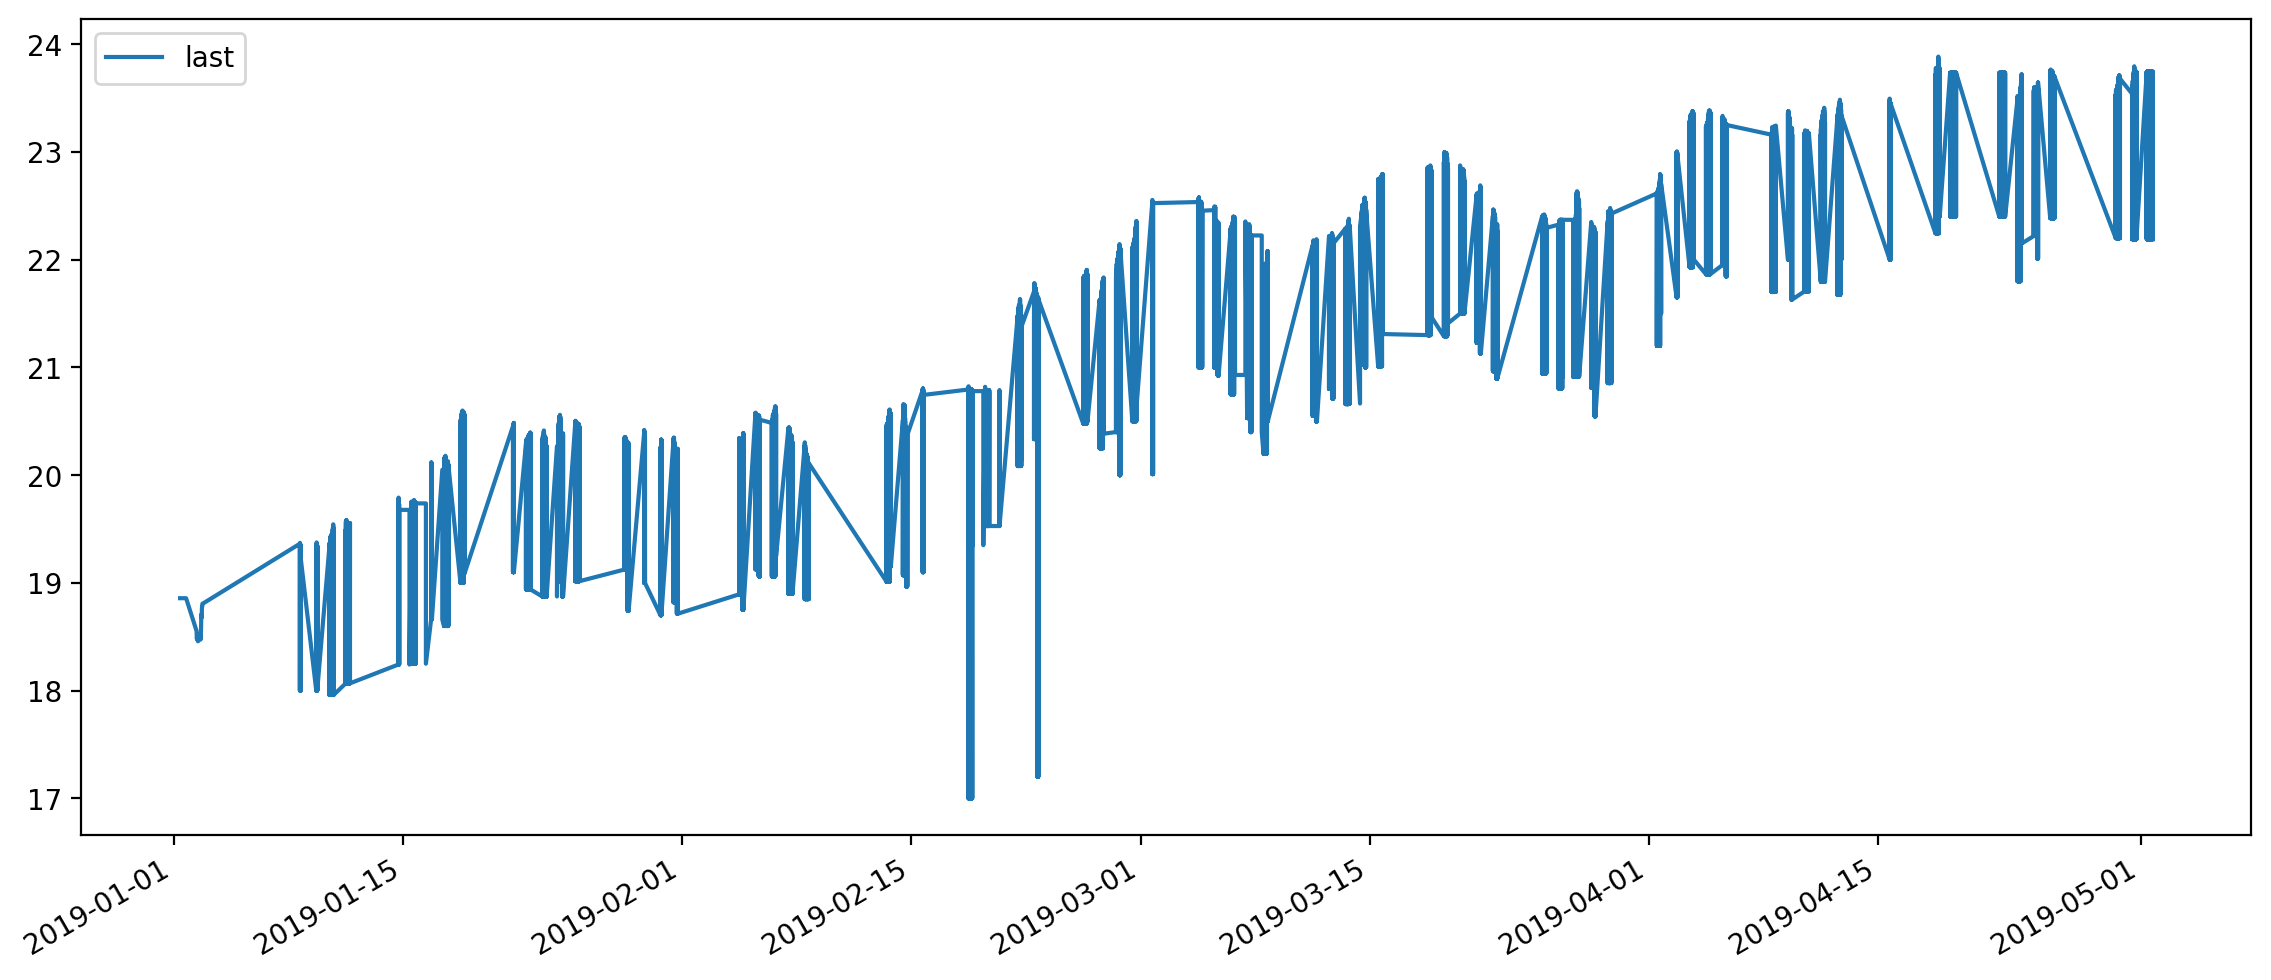

In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Tracer les données
axa.plot( y="last", figsize=(14, 6))

<Axes: >

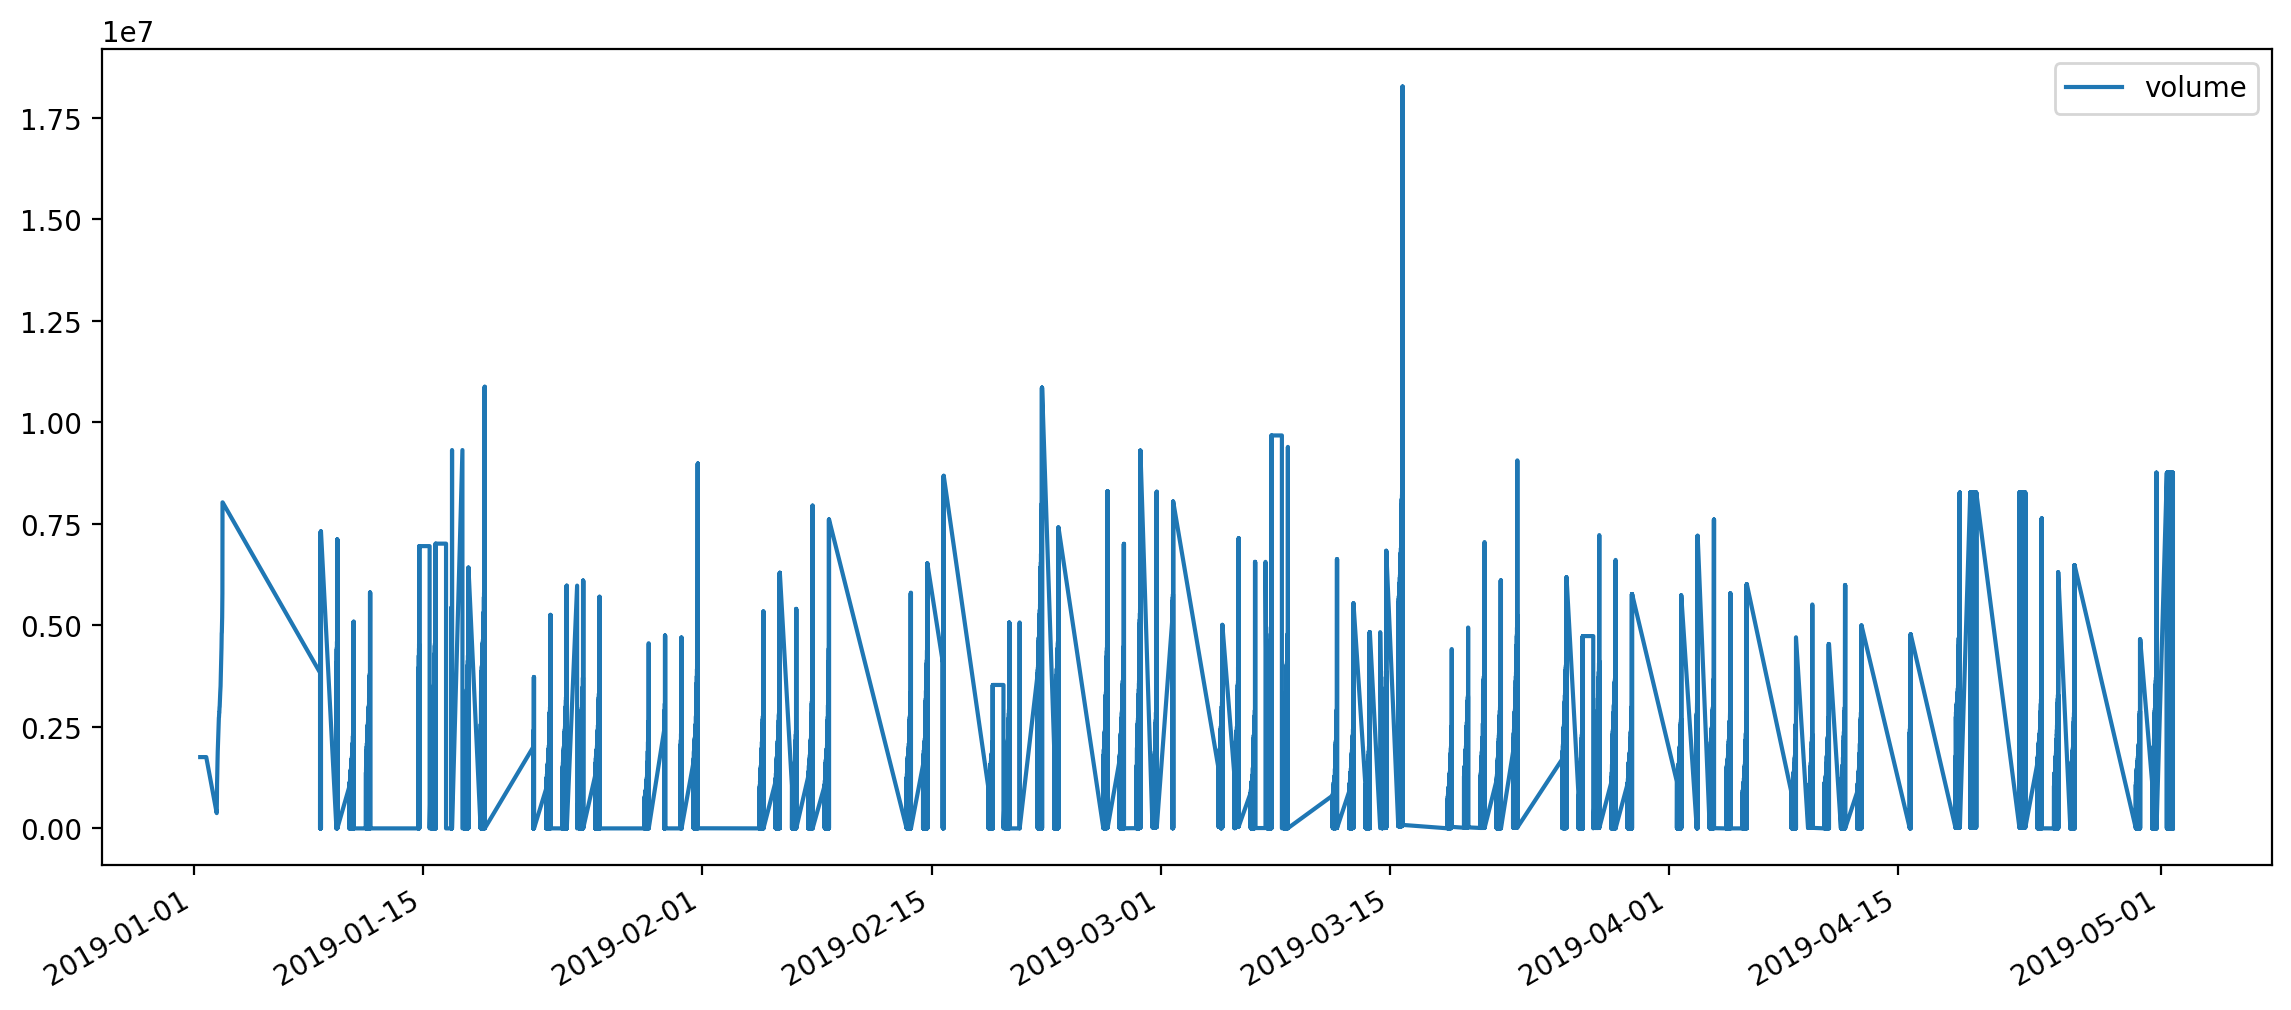

In [62]:
axa.plot(y="volume",  figsize=(14, 6))

<Axes: >

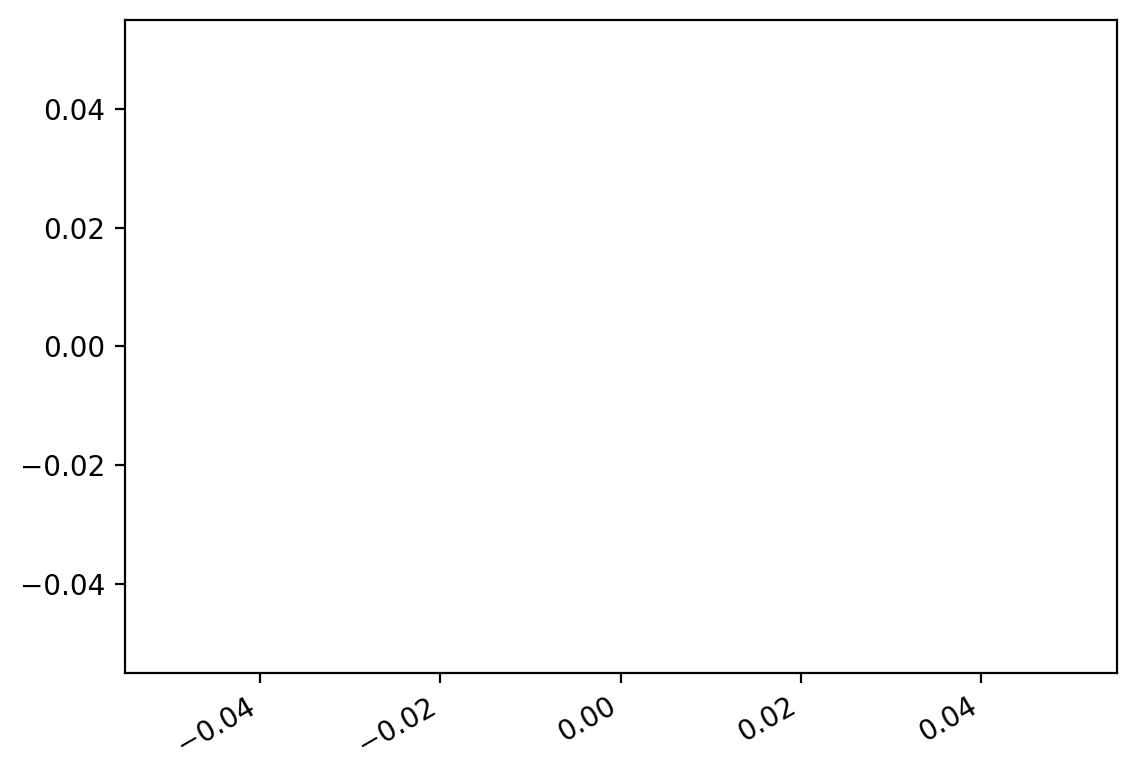

In [64]:
axa.loc["2019-01-03": "2019-01-03", "volume"].plot()

<Axes: >

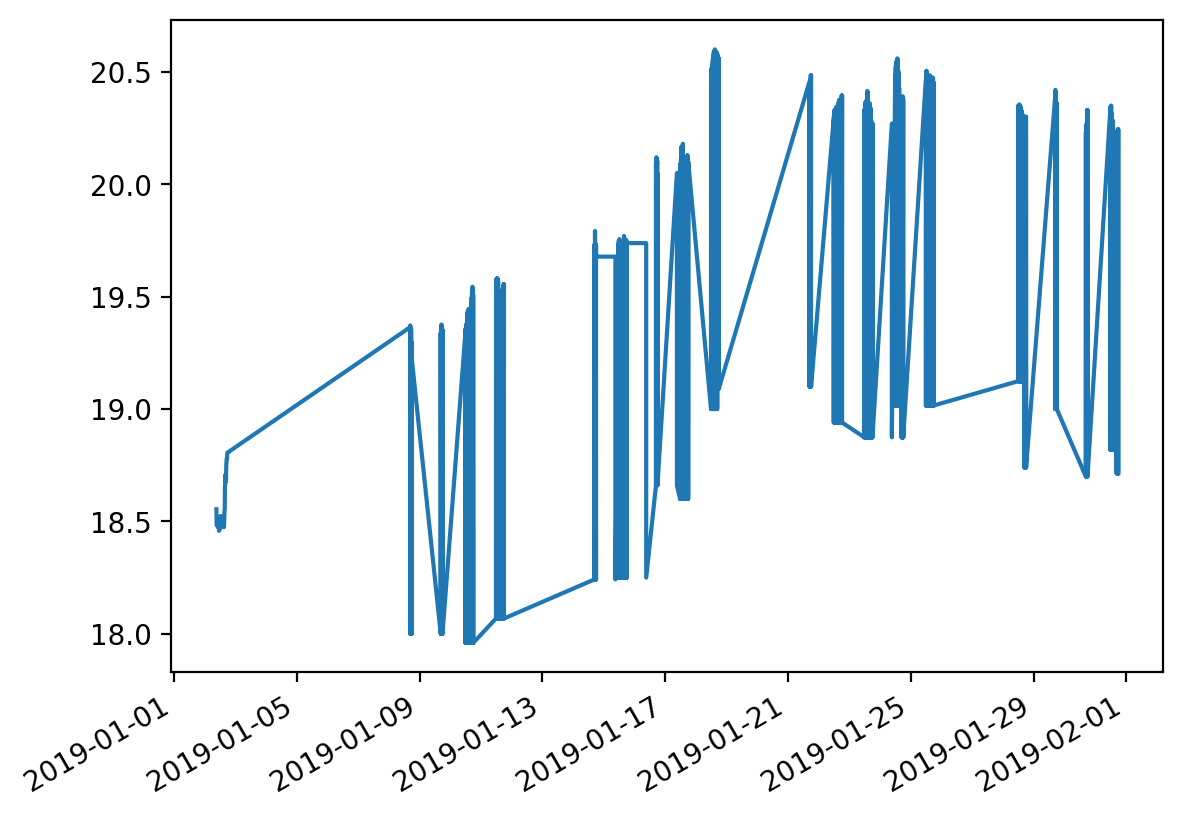

In [65]:
axa.loc["2019-01-02": "2019-02-03", "last"].plot()

Reproduisons cela pour toutes les actions

Supprimons Les jours off

In [38]:
from IPython.display import display
from dateutil.parser import parse

day_off = ['2018-01-01', '2018-03-30', '2018-04-02', '2018-05-01', '2018-12-25', '2018-12-26']
for d in day_off:
    compA.drop(compA.loc[d].index, inplace=True )

In [39]:
# on ajoute la colonne des symboles en index et on la met en premier
compA = compA.set_index('symbol', append=True)
compA = compA.swaplevel(0,1).sort_index()
compA.head()


last  volume              name
symbol                                                               
1rAAF  2023-01-02 09:02:01.941047  4.356(c)       0  AIR FRANCE - KLM
       2023-01-02 09:12:02.234401  4.356(c)       0  AIR FRANCE - KLM
       2023-01-02 09:22:01.577644  4.356(c)       0  AIR FRANCE - KLM
       2023-01-02 09:32:02.270436  4.356(c)       0  AIR FRANCE - KLM
       2023-01-02 09:42:01.776871  4.356(c)       0  AIR FRANCE - KLM

In [40]:
compA["last"] = [x.split("(c)")[0] for x in compA["last"]]
compA["last"] = [x.split("(s)")[0] for x in compA["last"]]


In [42]:
def convertion(x):
    try:
        return float(x)
    except:
        return float(x.replace(' ',''))
    
compA['last'] = compA['last'].apply(convertion)

In [44]:
compA["last"] = compA["last"].astype("float")
print("moyenne des cours de compA: ",np.mean(compA["last"]))

moyenne des cours de compA:  130.43553985515476


<Axes: >

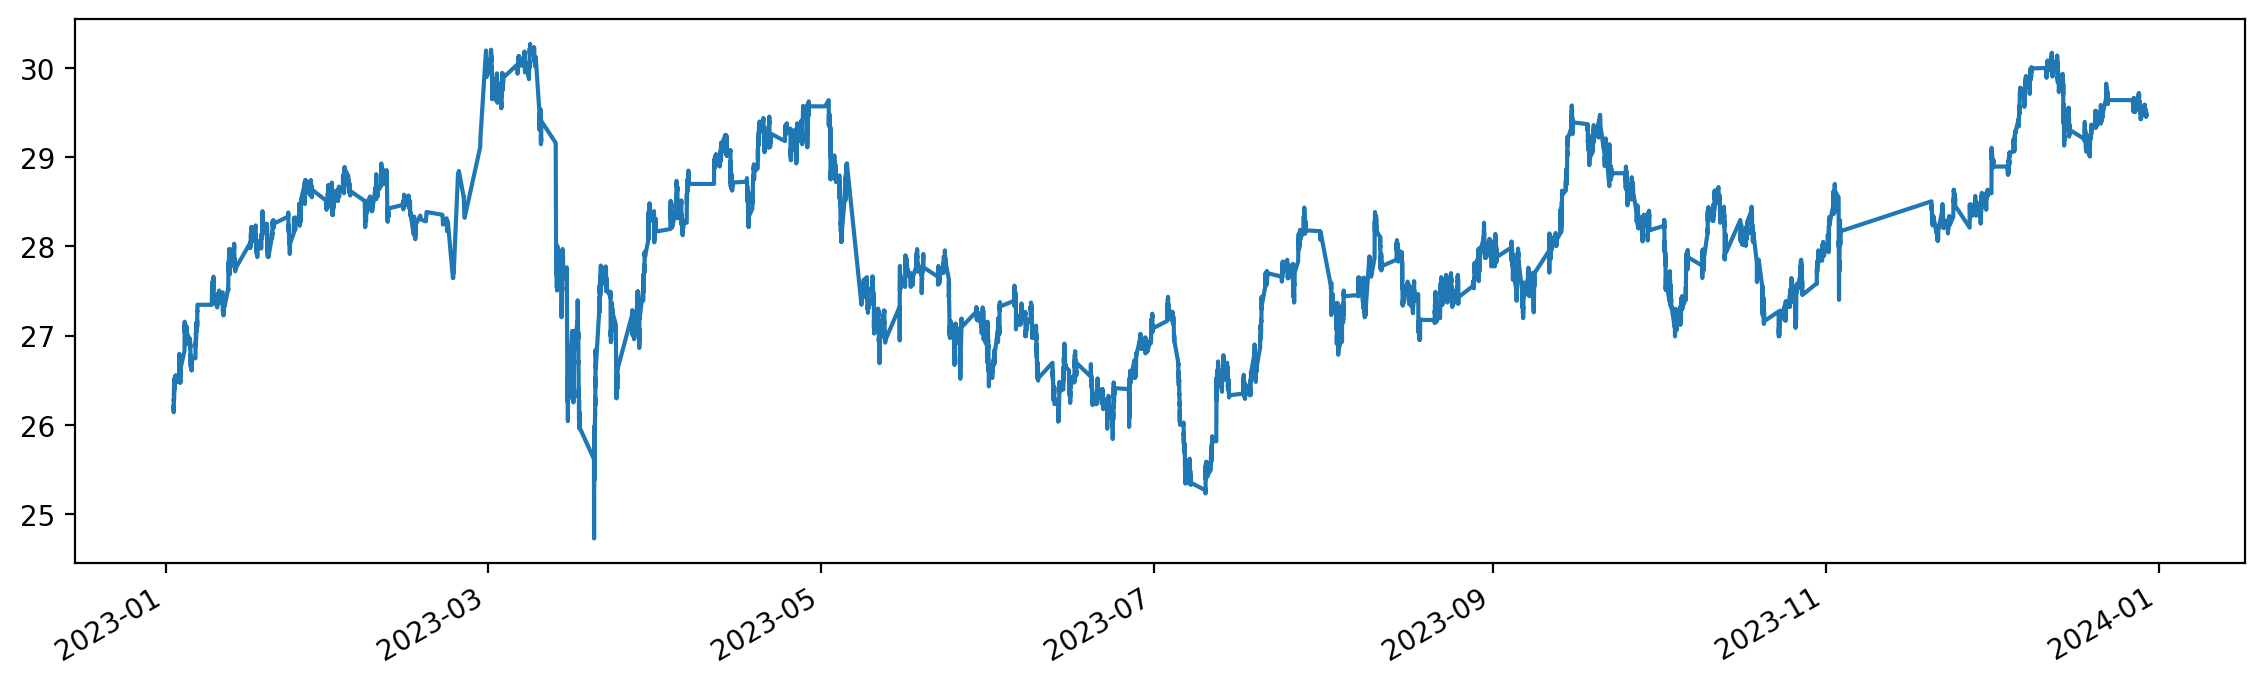

In [45]:
# Vérifions que la courbe d'AXA est toujours la même
compA.loc['1rPCS','last'].plot(figsize=(14,4))

In [51]:
print("masse monetaire avant: ", (compA["volume"] * compA["last"]).sum())

masse monetaire avant:  13422093916984.098


In [55]:
compB = collecte_df(market_name="compB")

Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcent

In [56]:
compB 

,last,volume,symbol,name
2023-11-21 10:12:01.914574,2.885,56246,1rPAB,SRDAB SCIENCE
2023-11-21 10:12:01.914574,4.980,6675,1rPABCA,SRDABC ARBITRAGE
2023-11-21 10:12:01.914574,10.240,1907,1rPABVX,ABIVAX
2023-11-21 10:12:01.914574,9.700(c),0,1rPABLD,ABL DIAGNOSTICS
2023-11-21 10:12:01.914574,9.950(c),0,1rPAAC,ACCOR ACQ COM
...,...,...,...,...
2023-08-31 10:12:01.376451,0.001,0,1rPVRADS,VRANKEN-POMMERY DS
2023-08-31 10:12:01.376451,28.800,579,1rPWAGA,WAGA ENERGY
2023-08-31 10:12:01.376451,54.200,1076,1rPWAVE,SRDWAVESTONE
2023-08-31 10:12:01.376451,10.460,5898,1rPXFAB,X-FAB SILICON


In [58]:
compB.groupby(by="name").mean()

/var/folders/gq/smvy125s6gvg8fmg2wlp7flc0000gn/T/ipykernel_18004/2295296480.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  compB.groupby(by="name").mean()


,volume
name,
AB SCIENCE,39484.584507
ABC ARBITRAGE,20126.746479
ABIVAX,20024.945646
ABL DIAGNOSTICS,14.624157
ACCOR ACQ COM,3387.626192
...,...
VRANKEN-POMMERY MO.,0.000000
WAGA ENERGY,1614.180849
WAVESTONE,2192.258741


In [60]:
abivax = compB[compB["name"] == "ABIVAX"]
abivax.head(10)

,last,volume,symbol,name
2023-11-21 10:12:01.914574,10.240,1907,1rPABVX,ABIVAX
2023-07-24 16:02:01.322937,17.200,25288,1rPABVX,ABIVAX
2023-07-19 17:42:01.885062,16.540,25671,1rPABVX,ABIVAX
2023-04-03 11:12:02.095625,7.250,5930,1rPABVX,ABIVAX
2023-03-30 11:32:02.022350,7.040,30113,1rPABVX,ABIVAX
2023-05-15 10:32:01.528204,19.440,71501,1rPABVX,ABIVAX
2023-11-02 09:22:01.917627,9.000,14626,1rPABVX,ABIVAX
2023-01-09 16:02:01.489822,7.060,20975,1rPABVX,ABIVAX
2023-06-28 10:22:01.573451,15.420,486,1rPABVX,ABIVAX
2023-06-16 09:32:01.784458,15.820,5038,1rPABVX,ABIVAX


In [62]:
abivax["last"] = [x.split("(c)")[0] for x in abivax["last"]]
abivax["last"] = [x.split("(s)")[0] for x in abivax["last"]]
abivax["last"] = abivax["last"].astype("float")
print("moyenne des cours d'ABIVAX: ",np.mean(abivax["last"]))

AttributeError: 'float' object has no attribute 'split'

<Axes: >

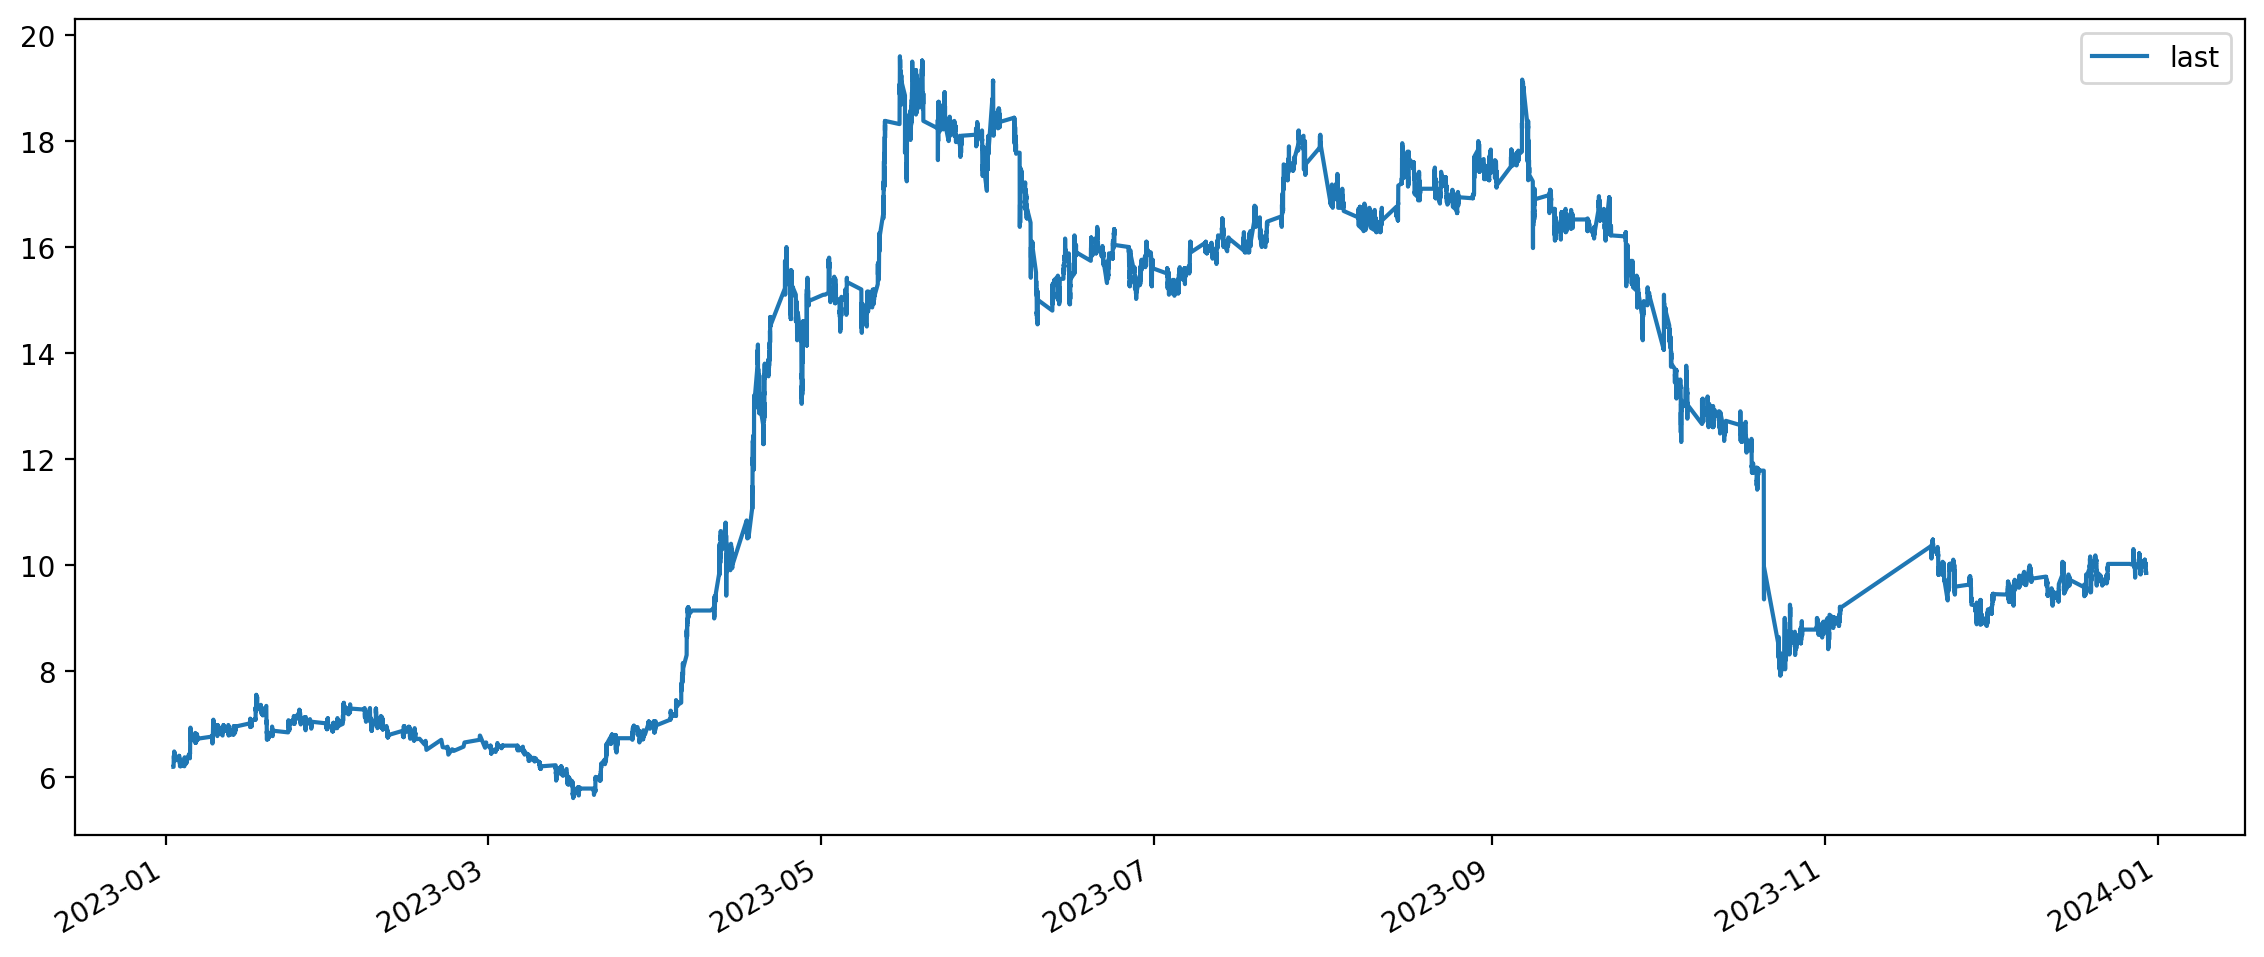

In [63]:
# Tracer les données
abivax.plot( y="last", figsize=(14, 6))

<Axes: >

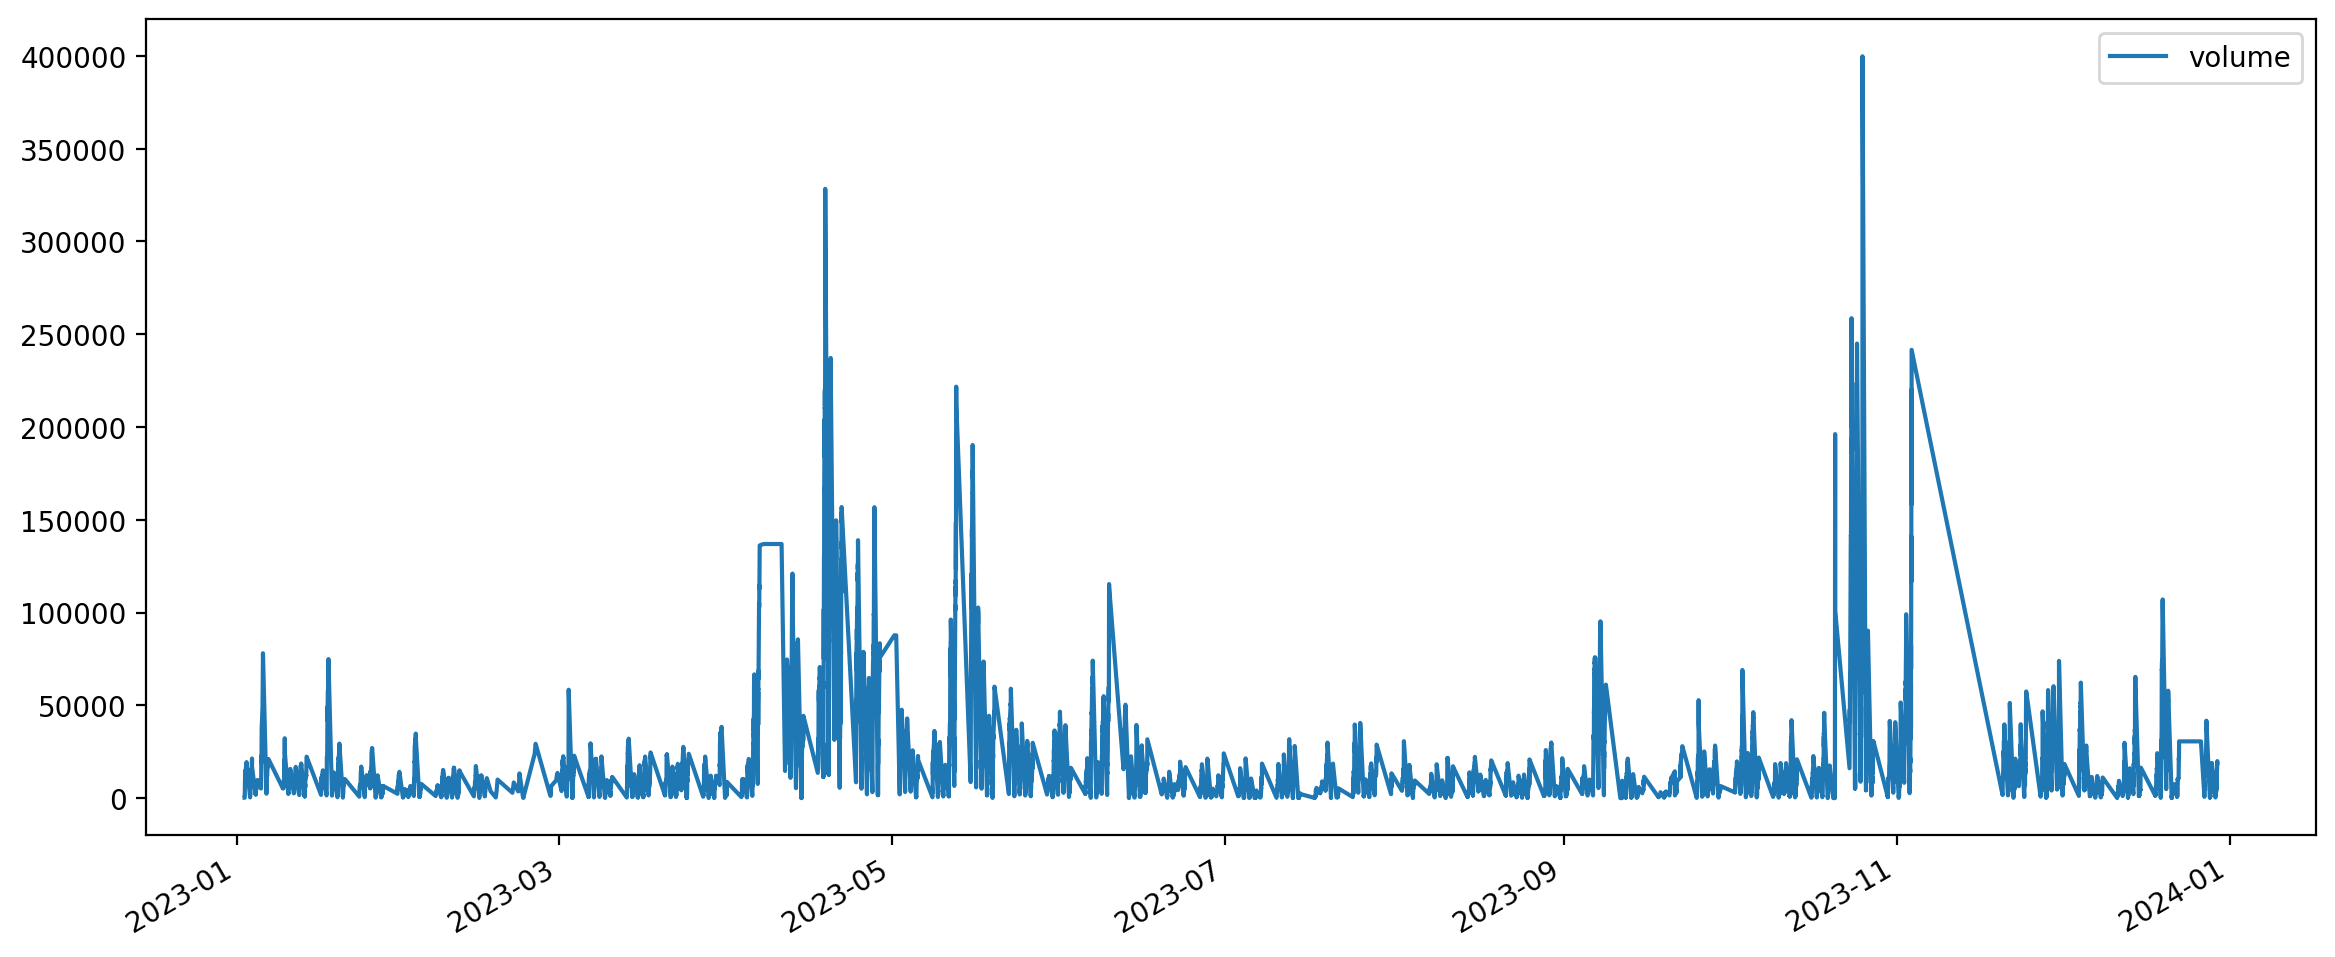

In [64]:
abivax.plot(y="volume",  figsize=(14, 6))

/var/folders/gq/smvy125s6gvg8fmg2wlp7flc0000gn/T/ipykernel_18004/3740730280.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  abivax.loc["2023-03-02": "2023-03-03", "volume"].plot()


<Axes: >

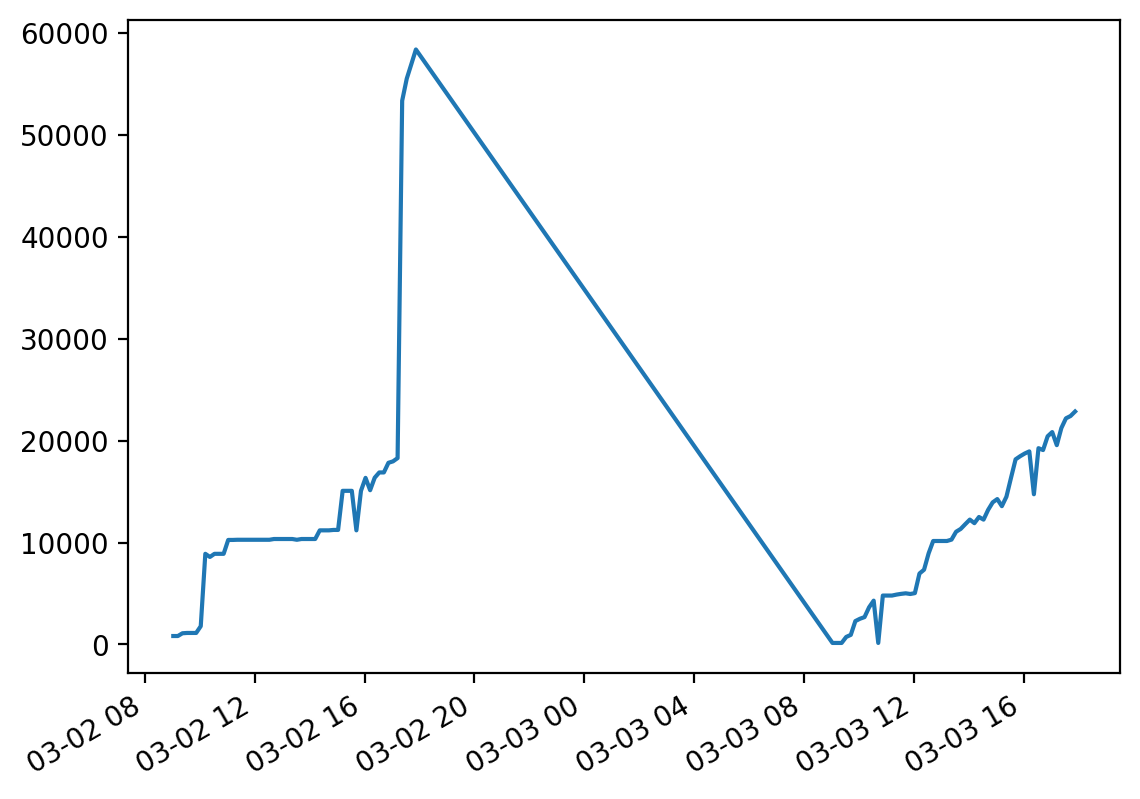

In [65]:
abivax.loc["2023-03-02": "2023-03-03", "volume"].plot()

/var/folders/gq/smvy125s6gvg8fmg2wlp7flc0000gn/T/ipykernel_18004/3837993594.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  abivax.loc["2023-03-02": "2023-03-03", "last"].plot()


<Axes: >

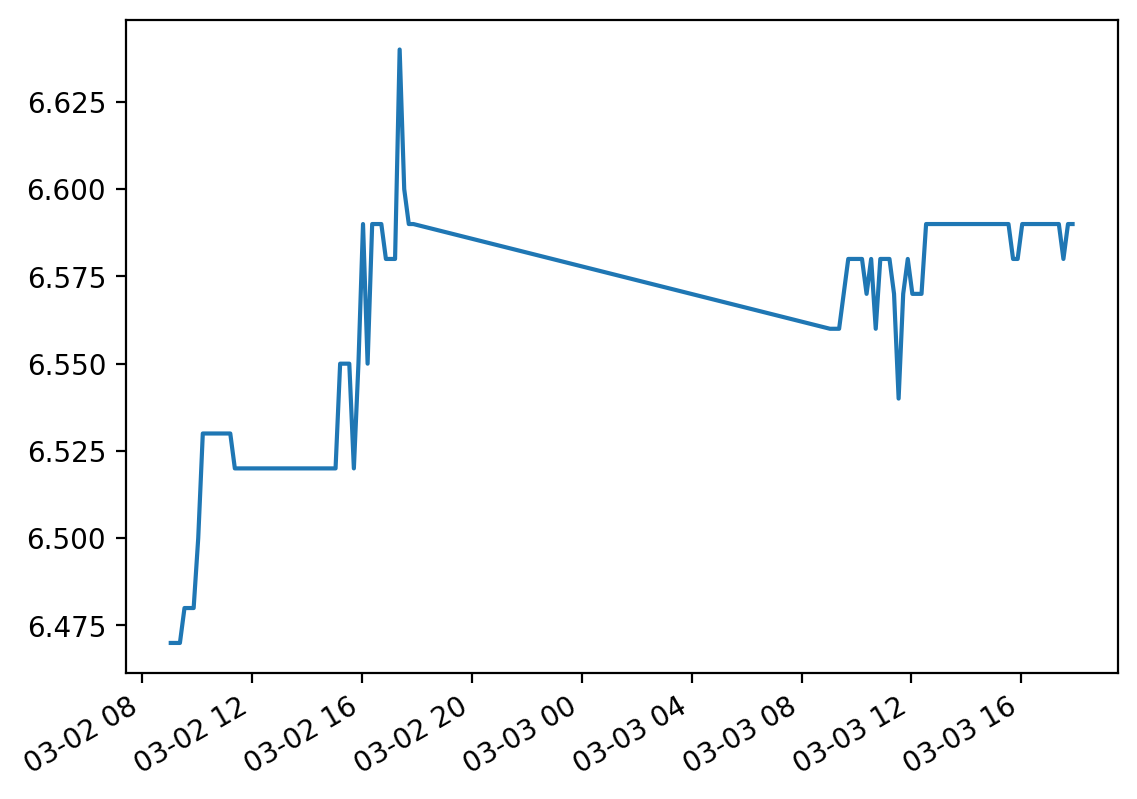

In [66]:
abivax.loc["2023-03-02": "2023-03-03", "last"].plot()

In [68]:
abivax.sort_index()
axa.loc["2023-03-02": "2023-03-03", "volume"]

2023-03-02 09:02:02.156611        0
2023-03-02 09:12:01.487764        0
2023-03-02 09:22:01.911275        0
2023-03-02 09:32:02.134285        0
2023-03-02 09:42:01.725008        0
                              ...  
2023-03-03 17:12:02.157229    11378
2023-03-03 17:22:01.323036    11378
2023-03-03 17:32:01.441334    11378
2023-03-03 17:42:01.505521    11378
2023-03-03 17:52:02.026347    11378
Name: volume, Length: 108, dtype: int64

In [70]:
for d in day_off:
    compB.drop(compB.loc[d].index, inplace=True )

In [72]:
# on ajoute la colonne des symboles en index et on la met en premier
compB = compB.set_index('symbol', append=True)
compB = compB.swaplevel(0,1).sort_index()
compB.head()

last  volume       name
symbol                                                          
1rP03227 2023-09-15 09:02:02.196706  0.000(s)       0  LATECOERE
         2023-09-15 09:12:02.202814  0.000(s)       0  LATECOERE
         2023-09-15 09:22:01.745589  0.000(s)       0  LATECOERE
         2023-09-15 09:32:01.362794  0.000(s)       0  LATECOERE
         2023-09-15 09:42:01.594774  0.000(s)       0  LATECOERE

In [75]:
compB["last"] = [str(x).split("(c)")[0] for x in compB["last"]]
compB["last"] = [str(x).split("(s)")[0] for x in compB["last"]]

In [76]:
compB['last'] = compB['last'].apply(convertion)

In [77]:
compB["last"] = compB["last"].astype("float")
print("moyenne des cours de compA: ",np.mean(compB["last"]))

moyenne des cours de compA:  127.59081379895008


<Axes: >

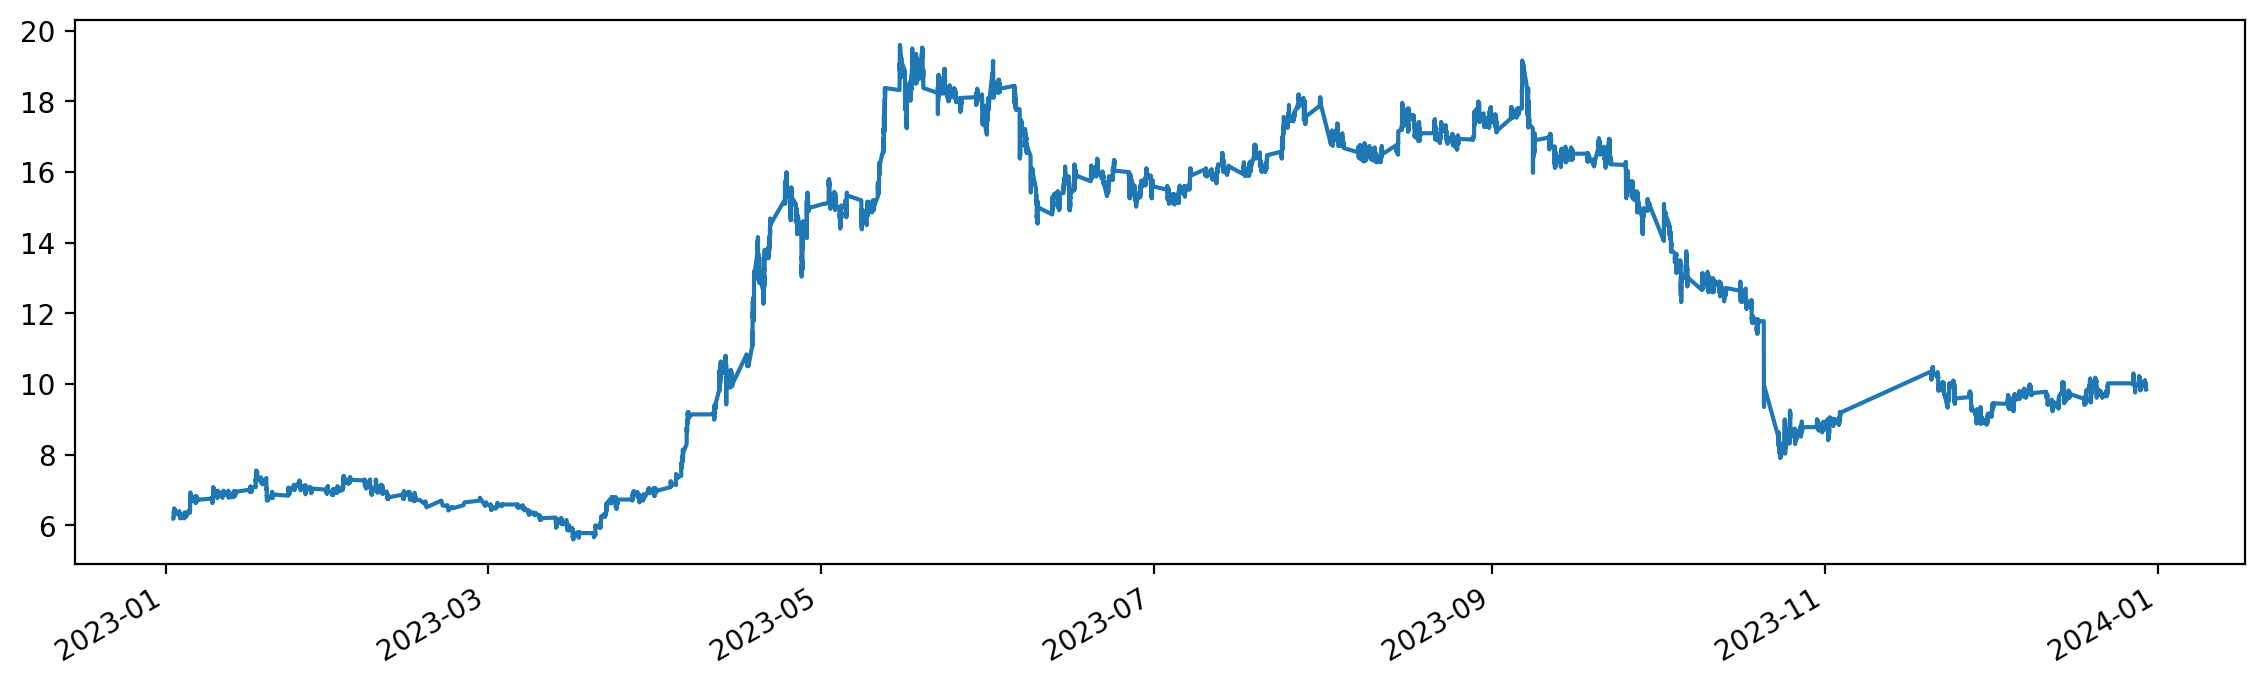

In [78]:
compB.loc['1rPABVX','last'].plot(figsize=(14,4))

<Axes: >

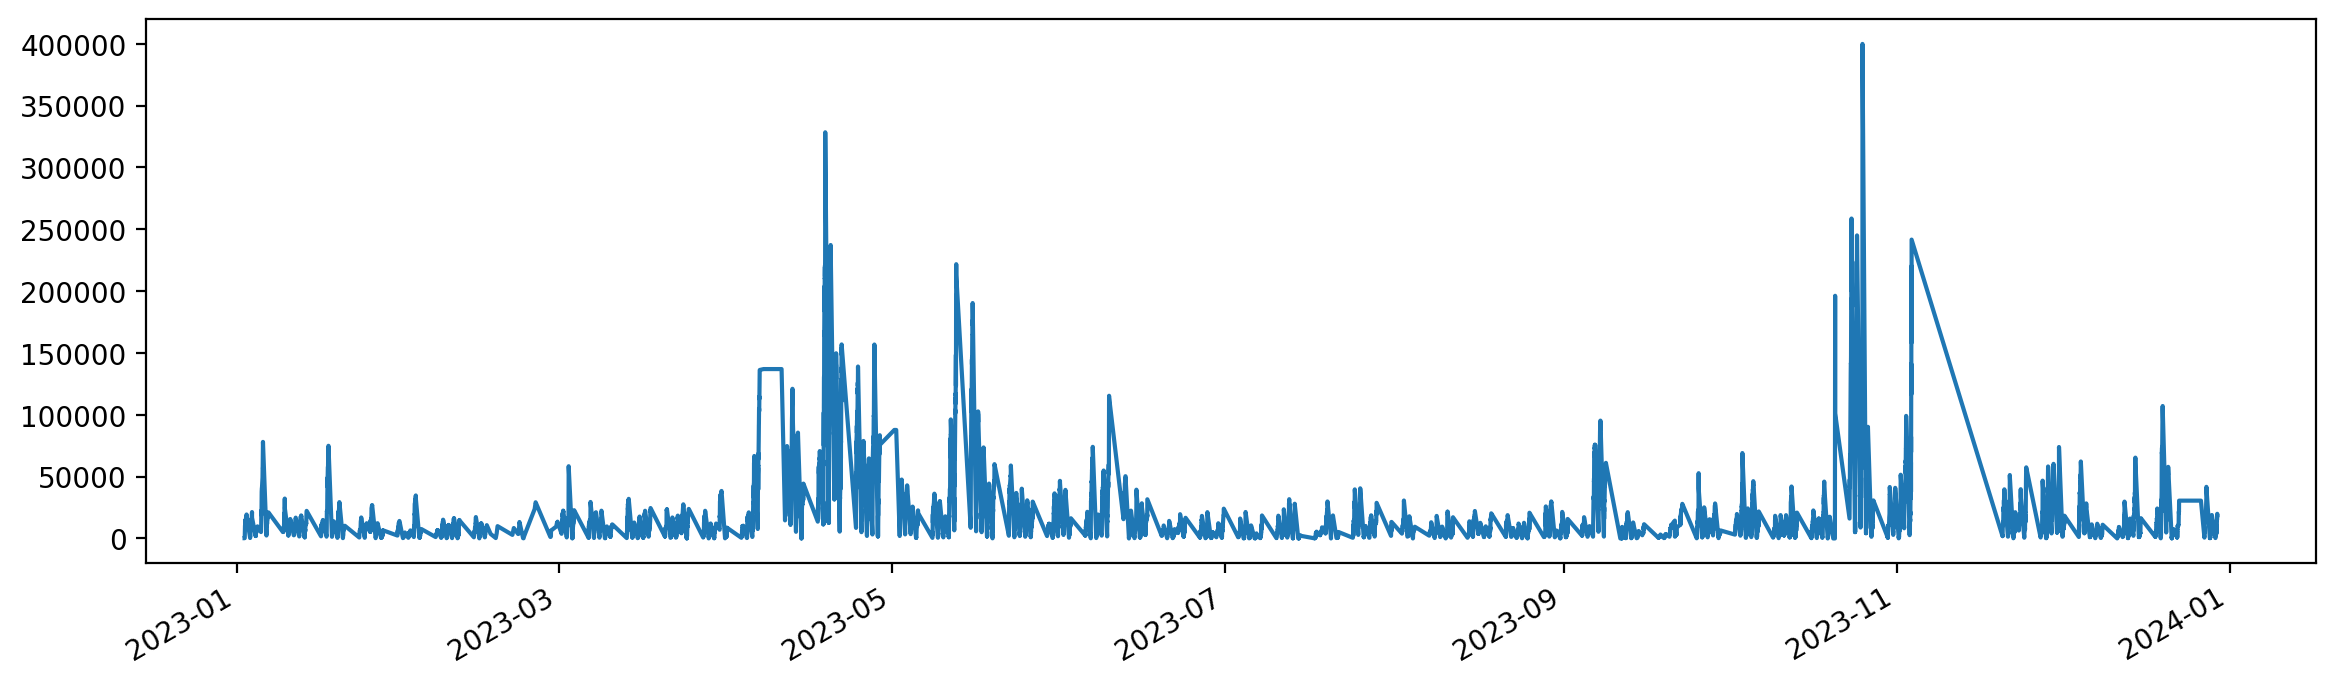

In [79]:
compB.loc['1rPABVX','volume'].plot(figsize=(14,4))